<a href="https://colab.research.google.com/github/dileep-rawat/Capstone_Project_3-Credit_Card_default_Prediction/blob/main/Credit_Card_Default_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

**Project Type**    - Classification

**Contribution**    - Individual

**Index:**

1. Problem statement
2. Importing Essential Libraries
3. Mounting drive
4. Data Exploration
5. Preprocessing & Data Cleaning
6. Exploratory Data Analysis
7. Feature engineering
8. ML model implementation
9. XG Boost model explainability using Shapley values
10. Results
11. Summary and conclusions
12. References

## <b> Problem Description </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments


# **2. Importing Essential Libraries:-**

In [ ]:
import pandas as pd
import numpy as np

# Importing Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt


# Importing warning for ignore warnings 
import warnings
warnings.filterwarnings("ignore")


#**3. Mounting drive:-**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## csv file location and reading csv file:-

In [ ]:
credit_df = pd.read_excel('/content/drive/MyDrive/Almabetter/Capstone Project/Credit Card Default Prediction/default of credit card clients.xls')

#**4. Data Exploration:-**

In [ ]:
#checking the shape ( rows and column numbers)
credit_df.shape

(30001, 25)

In [ ]:
# Checking first 5 rows
credit_df.head(5)

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [ ]:
# Checking last 5 rows
credit_df.tail(5)

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
29996,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
30000,30000,50000,1,2,1,46,0,0,0,0,...,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


In [ ]:
# Dataset Info
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  30001 non-null  object
 1   X1          30001 non-null  object
 2   X2          30001 non-null  object
 3   X3          30001 non-null  object
 4   X4          30001 non-null  object
 5   X5          30001 non-null  object
 6   X6          30001 non-null  object
 7   X7          30001 non-null  object
 8   X8          30001 non-null  object
 9   X9          30001 non-null  object
 10  X10         30001 non-null  object
 11  X11         30001 non-null  object
 12  X12         30001 non-null  object
 13  X13         30001 non-null  object
 14  X14         30001 non-null  object
 15  X15         30001 non-null  object
 16  X16         30001 non-null  object
 17  X17         30001 non-null  object
 18  X18         30001 non-null  object
 19  X19         30001 non-null  object
 20  X20   

## <b> Data Description </b>

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

# **5. Pre-processing & Data Cleaning:**



### Data cleaning is done in the following steps:-  
1) Droping and renaming the fatures  
2) Removing duplicate rows.  
3) Handling missing values.  
4) Converting columns to appropriate datatypes

### **Step-1: Droping and renaming the features:**

In [ ]:
credit_df.drop(columns='Unnamed: 0',inplace=True)

In [ ]:
# creating list of columns name for renaming data frame column names
columns = ['Limit_bal','Gender','Education','Marital_status','Age','Repayment_September','Repayment_August','Repayment_July','Repayment_June','Repayment_May',
           'Repayment_April','Sep_Bill','Aug_Bill','July_Bill','June_Bill','May_Bill','Apr_Bill','Pay_Sep','Pay_Aug','Pay_July','Pay_June','Pay_May','Pay_April','Defaulter'] 

In [ ]:
 # replace column name with columns list
credit_df.set_axis(columns, axis=1, inplace=True)

In [ ]:
# droping the axis 0
credit_df=credit_df.drop(0,axis=0).reset_index(drop=True)

In [ ]:
credit_df.head()

,Limit_bal,Gender,Education,Marital_status,Age,Repayment_September,Repayment_August,Repayment_July,Repayment_June,Repayment_May,...,June_Bill,May_Bill,Apr_Bill,Pay_Sep,Pay_Aug,Pay_July,Pay_June,Pay_May,Pay_April,Defaulter
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
# Checking the shape of data
credit_df.shape

(30000, 24)

In [ ]:
# checking information about each column, but all columns dtype is in object
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Limit_bal            30000 non-null  object
 1   Gender               30000 non-null  object
 2   Education            30000 non-null  object
 3   Marital_status       30000 non-null  object
 4   Age                  30000 non-null  object
 5   Repayment_September  30000 non-null  object
 6   Repayment_August     30000 non-null  object
 7   Repayment_July       30000 non-null  object
 8   Repayment_June       30000 non-null  object
 9   Repayment_May        30000 non-null  object
 10  Repayment_April      30000 non-null  object
 11  Sep_Bill             30000 non-null  object
 12  Aug_Bill             30000 non-null  object
 13  July_Bill            30000 non-null  object
 14  June_Bill            30000 non-null  object
 15  May_Bill             30000 non-null  object
 16  Apr_

### **Step-2: Removing duplicate rows:**

In [ ]:
credit_df.duplicated().value_counts()   #true means duplicate rows

False    29965
True        35
dtype: int64

So we have 31994 duplicate rows in our data and we will drop the duplicate rows from our data.

In [ ]:
# Dropping duplicate values
credit_df.drop_duplicates(inplace = True)

In [ ]:
# Exploring shape
credit_df.shape

(29965, 24)

### **Step-3 Handling missing values:**

In [ ]:
# # Checking null values
credit_df.isna().sum().sort_values(ascending= False).reset_index().rename(columns={'index':'Columns',0:'Null values'})

,Columns,Null values
0,Limit_bal,0
1,Gender,0
2,Pay_April,0
3,Pay_May,0
4,Pay_June,0
5,Pay_July,0
6,Pay_Aug,0
7,Pay_Sep,0
8,Apr_Bill,0
9,May_Bill,0


So we don't have any missing value

### **Step-4: Convert columns to appropriate datatypes:**

In [ ]:
# Converting all columns from Object to int 
for i in credit_df.columns:
  credit_df[i]=credit_df[i].astype('int')

In [ ]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29965 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Limit_bal            29965 non-null  int64
 1   Gender               29965 non-null  int64
 2   Education            29965 non-null  int64
 3   Marital_status       29965 non-null  int64
 4   Age                  29965 non-null  int64
 5   Repayment_September  29965 non-null  int64
 6   Repayment_August     29965 non-null  int64
 7   Repayment_July       29965 non-null  int64
 8   Repayment_June       29965 non-null  int64
 9   Repayment_May        29965 non-null  int64
 10  Repayment_April      29965 non-null  int64
 11  Sep_Bill             29965 non-null  int64
 12  Aug_Bill             29965 non-null  int64
 13  July_Bill            29965 non-null  int64
 14  June_Bill            29965 non-null  int64
 15  May_Bill             29965 non-null  int64
 16  Apr_Bill             2

In [ ]:
# Defining 3 lists containing the column names of 
# a. dependent variables
# b. continuous independent variables
# c. categorical independent variables
# This is defined based on the number of unique values for each attribute

dependent_variable = ['Defaulter']
continuous_variable = ['Limit_bal','Sep_Bill','Aug_Bill', 'July_Bill', 'June_Bill', 'May_Bill', 'Apr_Bill']
categorical_variable = ['Gender', 'Education', 'Marital_status','Age','Repayment_September','Repayment_August','Repayment_July', 'Repayment_June','Repayment_May','Repayment_April']

### EDA

## **6.1. Analyzing the distribution of the dependent variable:**

In [ ]:
# Distribution of dependent variable
credit_df[dependent_variable].value_counts(normalize=True)

Defaulter
0            0.778742
1            0.221258
dtype: float64

Text(0.5, 1.0, 'Defaulterdistribution')

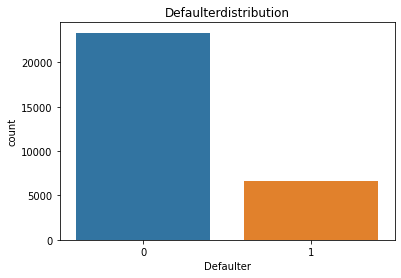

In [ ]:
# Distribution of dependent varaible - Defaulter 
sns.countplot(credit_df[dependent_variable[0]])
plt.xlabel(dependent_variable[0])
plt.title(dependent_variable[0]+'distribution')

**The dependent variable - Defaulter is imbalanced, with 78% non-default vs. 22% default.**



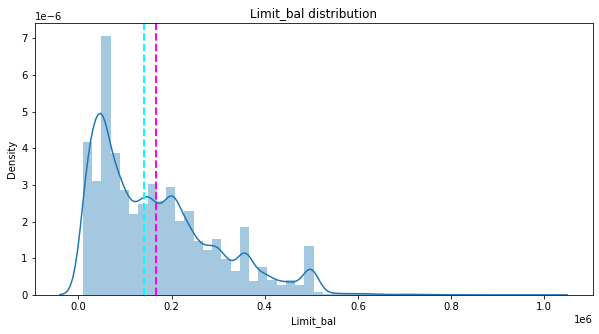

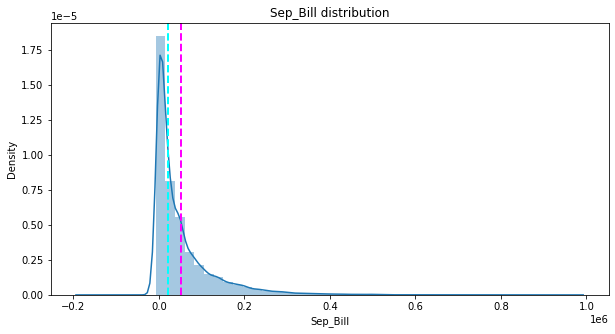

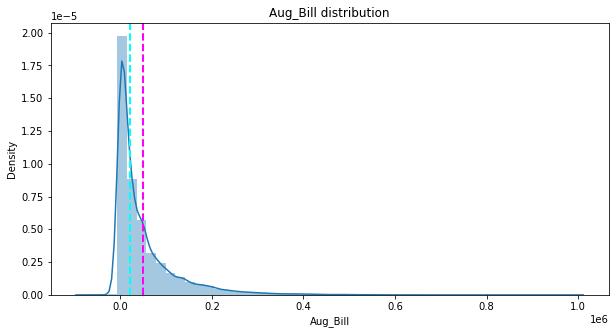

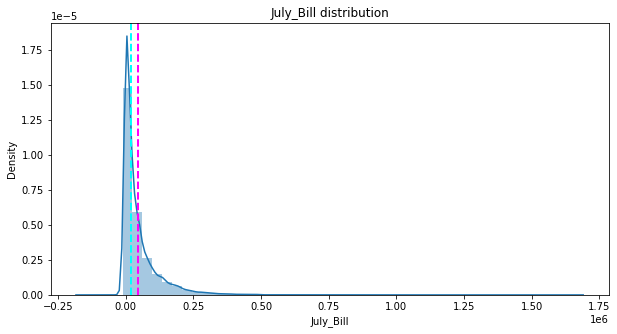

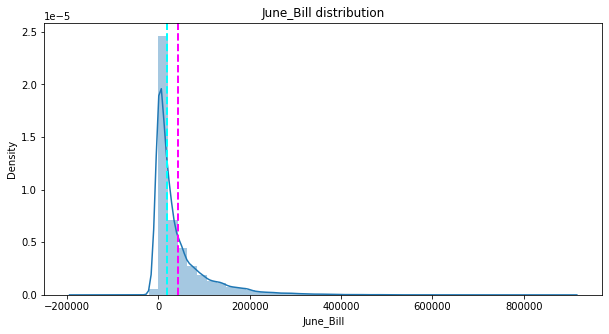

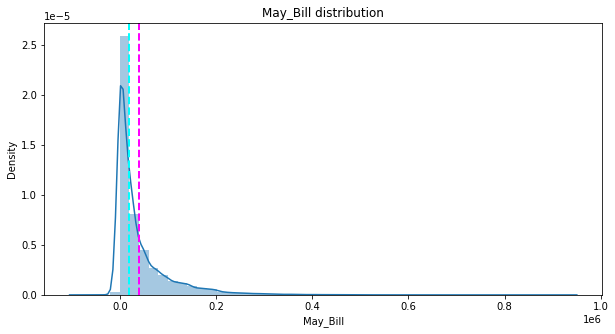

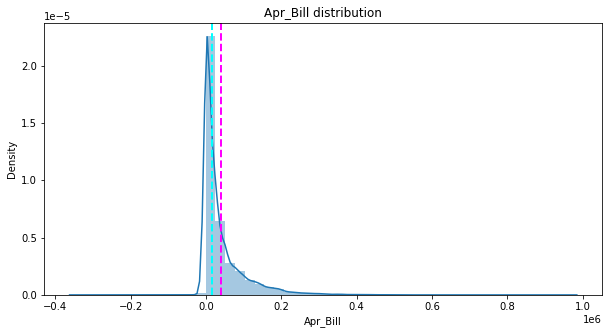

In [ ]:
# Analysing the distribution of continuous variables in the dataset
for col in continuous_variable:
  plt.figure(figsize=(10,5))
  sns.distplot(credit_df[col])
  plt.axvline(credit_df[col].mean(), color='magenta', linestyle='dashed', linewidth=2)
  plt.axvline(credit_df[col].median(), color='cyan', linestyle='dashed', linewidth=2)
  plt.title(col+' distribution')
  plt.show()

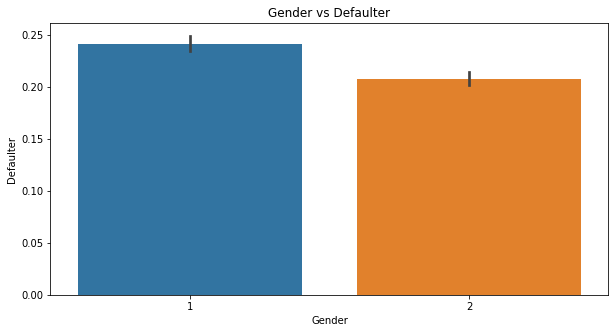

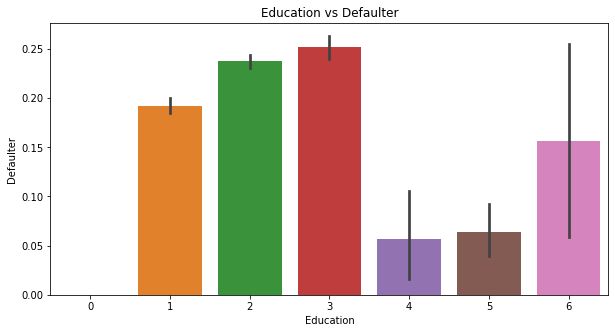

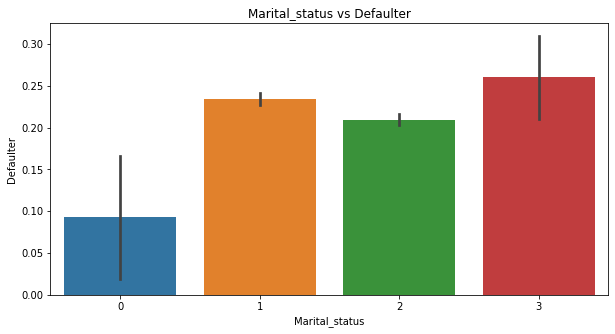

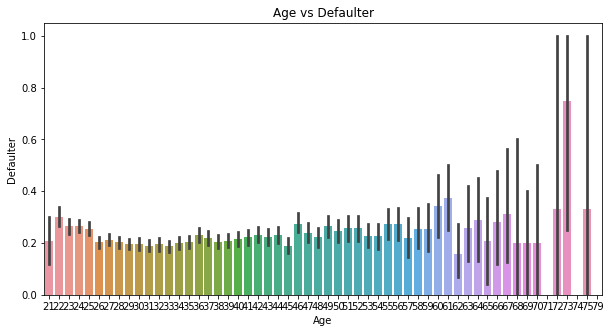

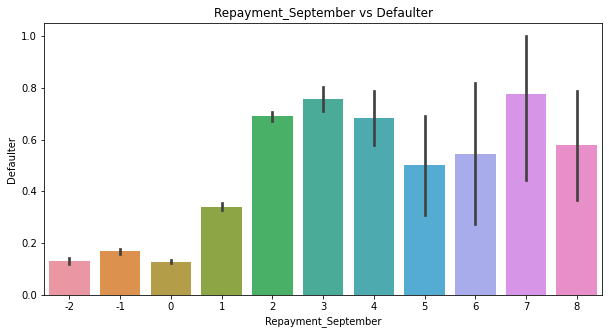

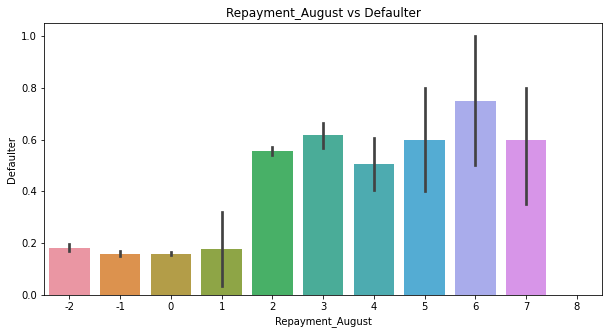

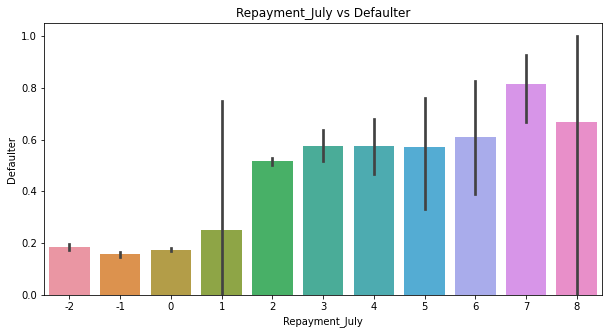

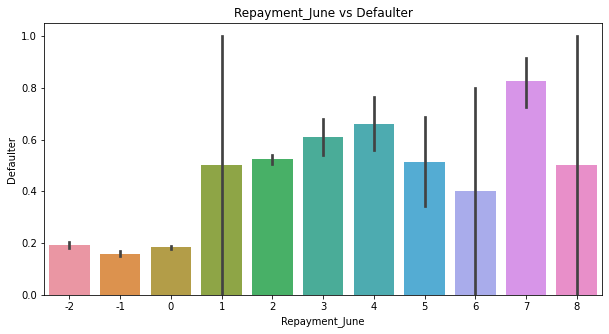

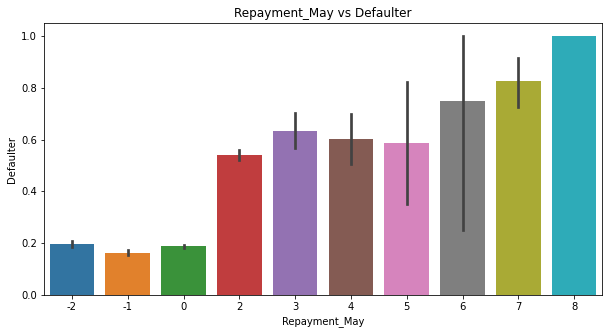

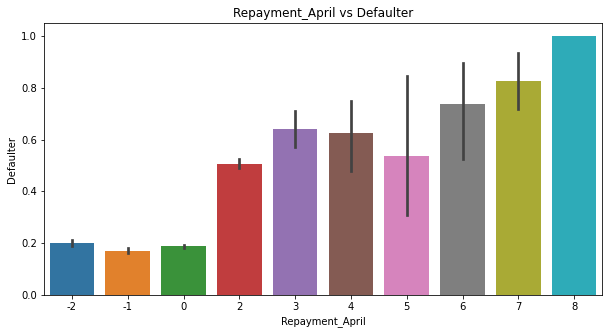

In [ ]:
# Analyzing the relationship between the dependent variable and the categorical variables
for i in categorical_variable:
    plt.figure(figsize=(10,5))
    sns.barplot(data=credit_df, x=i, y=dependent_variable[0])
    plt.xlabel(i)
    plt.ylabel(dependent_variable[0])
    plt.title(i+' vs '+ dependent_variable[0])

**Summary:**

* **More number of credit defaulter are Male as the number of male credit card holder is more..**
* **The rented bike counts is higher during the summer and lowest during the winter.**
* **The rented bike count is higher on working days than on non working days.**
* **On a non functioning day, no bikes are rented in all the instances of the data.**
* **The number of bikes rented on average remains constant throughout Monday - Saturday, it dips on Sunday.**
* **The rented bike counts is slightly lower on weekends than on weekdays.**

# **8. ML Model Implementation:**